### 导入所需库及配置项

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 读取示例数据集并可视化

In [2]:
# 读取 txt 文件
dataSet = np.loadtxt('testData.txt' , delimiter='\t')
dataSet[:5]

array([[ 3.275154,  2.957587],
       [-3.344465,  2.603513],
       [ 0.355083, -3.376585],
       [ 1.852435,  3.547351],
       [-2.078973,  2.552013]])

In [3]:
dataSet.shape

(60, 2)

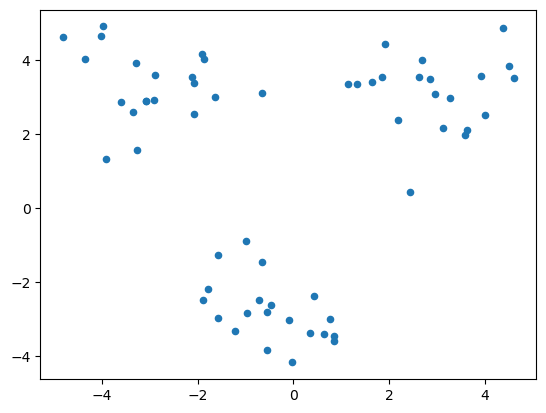

In [4]:
# 绘图
plt.scatter(dataSet[:,0] , dataSet[:,1] , s=20 )

### K均值算法实现

In [5]:
# 定义计算两个向量的欧式距离的函数
def euclidean_distance(vecA, vecB):
    return np.sqrt(sum(pow(vecA - vecB, 2)))

In [6]:
# 定义质心初始化函数
def centroids_init(dataSet , k):
    """
    质心初始化函数
    Parameters，参数说明:
    dataSet：数据集
    k:簇的数目
    输出：
    centroids：簇的质心矩阵
    """
    # 数据的特征维度数目
    n = dataSet.shape[1]
    # 创建一个全零的数组
    centroids = np.zeros((k,n))
    for j in range(n):
        # 计算每个特征维度的的最小值
        minJ = min(dataSet[:,j])
        # 每个特征维度最大值 - 最小值
        rangeJ = max(dataSet[:,j]) - min(dataSet[:,j])
        # 在整个数据集的边界范围内，创建随机质心
        centroids[:,j] = minJ + rangeJ*np.random.rand(k,)
    return centroids

In [7]:
def kMeans(dataSet, k, calculatedists=euclidean_distance, createCent=centroids_init):
    """
    K均值算法
    Parameters，参数说明:
    dataSet：数据集
    k:簇的数目
    calculatedists:计算距离的函数
    createCent:创建初始簇质心的函数
    输出：
    centroids：簇的质心矩阵
    clusterAssment：簇分配结果以及与簇质心间的距离
    """
    m = dataSet.shape[0]
    # 存储每个点的簇分配结果（第一列）以及与簇质心间的距离（第二列）
    clusterAssment = np.zeros((m,2))
    # 生成初始簇质心
    centroids = createCent(dataSet,k)
    
    clusterChange = True
    while clusterChange:
        clusterChange = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = calculatedists(centroids[j,:] , dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex:clusterChange = True
            clusterAssment[i,:] = minIndex , minDist**2
#         print(centroids)
        for cent in range(k):
            # 获取每个簇包含的所有点
            ptsInClust = dataSet[clusterAssment[:,0] == cent]
            # 计算每个簇的数据点的平均值，并将其作为新的簇中心点
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

### 二分K均值算法实现

In [8]:
def biKmeans(dataSet, k, calculatedists=euclidean_distance):
    """
    二分K均值算法
    Parameters，参数说明:
    dataSet：数据集
    k:簇的数目
    calculatedists:计算距离的函数
    输出：
    centroids：簇的质心矩阵
    clusterAssment：簇分配结果以及与簇质心间的距离
    """
    m = dataSet.shape[0]
    # 存储每个点的簇分配结果（第一列）以及与簇质心间的距离（第二列）
    clusterAssment = np.zeros((m,2))
    # 计算整个数据集的质心
    centroid0 = np.mean(dataSet, axis=0)
    # 创建一个列表，用于保留所有的质心
    centList =[centroid0.tolist()]
    # 计算初始误差
    for j in range(m):
        clusterAssment[j,1] = calculatedists(centroid0, dataSet[j,:])**2
        
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            # 当前簇中的数据点
            ptsInCurrCluster = dataSet[clusterAssment[:,0]==i]
            # 通过k均值算法将该簇划分为两个簇
            centroids, splitClustAss = kMeans(ptsInCurrCluster, 2, calculatedists)
            # 计算当前簇的SSE误差值
            sseSplit = sum(splitClustAss[:,1])
            # 计算剩余数据集的误差值
            sseNotSplit = sum(clusterAssment[clusterAssment[:,0]!=i,1])
            print("sseSplit and notSplit: ",sseSplit,sseNotSplit)
            # 将 SSE误差 与当前的最小值相比较
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroids
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[(bestClustAss[:,0] == 1),0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[(bestClustAss[:,0] == 0),0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        # 原有一个质心更新为两个质心
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()
        centList.append(bestNewCents[1,:].tolist())
        # 重新分配新的簇
        clusterAssment[(clusterAssment[:,0] == bestCentToSplit),:]= bestClustAss
    return np.array(centList), clusterAssment

### 可视化聚类结果

In [9]:
centroids, clusterAssment = biKmeans(dataSet, 3)

sseSplit and notSplit:  570.7227574246753 0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
sseSplit and notSplit:  28.719862324781683 532.6598067890178
sseSplit and notSplit:  68.68654812621844 38.06295063565754
the bestCentToSplit is:  1
the len of bestClustAss is:  40


In [10]:
centroids

array([[-2.94737575,  3.3263781 ],
       [ 2.93386365,  3.12782785],
       [-0.45965615, -2.7782156 ]])

In [11]:
clusterAssment

array([[1.00000000e+00, 1.45461050e-01],
       [0.00000000e+00, 6.80213825e-01],
       [2.00000000e+00, 1.02184582e+00],
       [1.00000000e+00, 1.34548760e+00],
       [0.00000000e+00, 1.35376464e+00],
       [2.00000000e+00, 3.87167519e+00],
       [1.00000000e+00, 8.37259951e-01],
       [0.00000000e+00, 2.20116272e-01],
       [2.00000000e+00, 3.53809057e+00],
       [1.00000000e+00, 7.44081160e+00],
       [0.00000000e+00, 5.28070040e+00],
       [2.00000000e+00, 2.56674394e-02],
       [1.00000000e+00, 1.11946529e+00],
       [0.00000000e+00, 1.67890884e-01],
       [2.00000000e+00, 2.11734245e+00],
       [1.00000000e+00, 1.49635209e+00],
       [0.00000000e+00, 4.93628241e+00],
       [2.00000000e+00, 9.76749869e-03],
       [1.00000000e+00, 1.32453845e-01],
       [0.00000000e+00, 6.39346045e-01],
       [2.00000000e+00, 9.41791924e-01],
       [1.00000000e+00, 1.72445523e+00],
       [0.00000000e+00, 7.50682798e-01],
       [2.00000000e+00, 1.48785604e-01],
       [1.000000

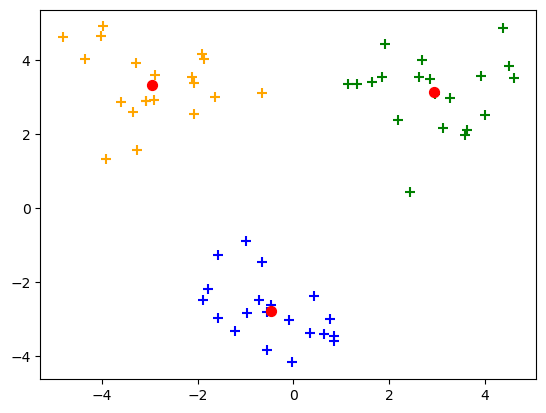

In [12]:
color = ["orange" , "green" , "blue" ]
m = dataSet.shape[0]

# 根据簇类别分别可视化原数据点
for i in range(m):
    if clusterAssment[i,0] == 0:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[0])
    if clusterAssment[i,0] == 1:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[1])
    if clusterAssment[i,0] == 2:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[2])
        
# 可视化最终簇质心点
for i in range(3):
    plt.scatter(centroids[i,0] , centroids[i,1] , marker="o" , s=50 , color="red")